In [1]:
import sys  
sys.path.insert(1, '../../')

import torch

from torchvision import datasets, transforms
from torch.utils.data import DataLoader, RandomSampler

from classifiers.nn.siamese.siamese_model import SiameseNetwork
from datasets.siamese_dataset import SiameseNetworkDataset
from determining.random_settings import determine_random

import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
determine_random()
# Автоматическое определение, где запускать код: на Nvidia GPU или на CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"Running on {device}")

# Resize the images and transform to tensors
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()
                                     ])

train_dataset = SiameseNetworkDataset(
    image_folder_dataset=datasets.ImageFolder(root="../../datasets/siamese/data/faces/training/"),
    transform=transformation)
test_dataset = SiameseNetworkDataset(
    image_folder_dataset=datasets.ImageFolder(root="../../datasets/siamese/data/faces/testing/"),
    transform=transformation)
trainset = DataLoader(train_dataset,
                      sampler=RandomSampler(train_dataset),
                      num_workers=8,
                      batch_size=64)
testset = DataLoader(test_dataset, num_workers=2, batch_size=1, sampler=RandomSampler(test_dataset))

model = SiameseNetwork().to(device)

print(model)

Running on cuda
SiameseNetwork(
  (cnn1): Sequential(
    (0): Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU(inplace=True)
  )
  (fc1): Sequential(
    (0): Linear(in_features=384, out_features=1024, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=1024, out_features=256, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=256, out_features=2, bias=True)
  )
)


/home/vladislav/experiments/texts-similarity/.venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [3]:
model.start_train(trainset, 100)

Epoch 1/100, Loss: 0.6254859566688538


/home/vladislav/experiments/texts-similarity/notebooks/siamese/../../classifiers/nn/siamese/siamese_model.py:115: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  y_true=torch.tensor(y_true),


Epoch 2/100, Loss: 1.2239738702774048
Epoch 3/100, Loss: 1.0489091873168945
Epoch 4/100, Loss: 0.6168972849845886
Epoch 5/100, Loss: 0.6064402461051941
Epoch 6/100, Loss: 0.7657979130744934
Epoch 7/100, Loss: 0.8355996012687683
Epoch 8/100, Loss: 0.5218048095703125
Epoch 9/100, Loss: 0.767145574092865
Epoch 10/100, Loss: 0.6348916292190552
Epoch 11/100, Loss: 0.4663352966308594
Epoch 12/100, Loss: 0.3720834255218506
Epoch 13/100, Loss: 0.5407091975212097
Epoch 14/100, Loss: 0.43594467639923096
Epoch 15/100, Loss: 0.5114095211029053
Epoch 16/100, Loss: 0.41290283203125
Epoch 17/100, Loss: 0.32404521107673645
Epoch 18/100, Loss: 0.26517975330352783
Epoch 19/100, Loss: 0.31094101071357727
Epoch 20/100, Loss: 0.2930867075920105
Epoch 21/100, Loss: 0.3611268401145935
Epoch 22/100, Loss: 0.4293256998062134
Epoch 23/100, Loss: 0.24830186367034912
Epoch 24/100, Loss: 0.44053560495376587
Epoch 25/100, Loss: 0.3361167907714844
Epoch 26/100, Loss: 0.36396610736846924
Epoch 27/100, Loss: 0.4412940

In [4]:
model.do_test(testset)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

0.572972972972973
41

0.5540540540540541
41

0.563354721628103
41


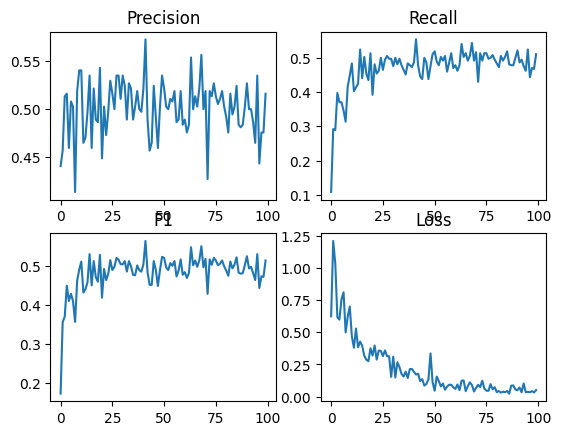

In [5]:
max_precision = 0
max_precision_i = 0
max_f1 = 0
max_f1_i = 0
max_recall = 0
max_recall_i = 0

for i, (stat) in enumerate(model.train_stat):
    # print(i)
    # print(f'Precision: {stat.precision:.2f}')
    # print(f'Recall: {stat.recall:.2f}')
    # print(f'F1 Score: {stat.f1:.2f}')
    # print(f'Loss: {stat.loss:.2f}')
    if (max_precision < stat.precision):
        max_precision = stat.precision
        max_precision_i = i

    if (max_f1 < stat.f1):
        max_f1 = stat.f1
        max_f1_i = i

    if (max_recall < stat.recall):
        max_recall = stat.recall
        max_recall_i = i
print(max_precision)
print(max_precision_i)
print()
print(max_recall)
print(max_recall_i)
print()
print(max_f1)
print(max_f1_i)

# Get the angles from 0 to 2 pie (360 degree) in narray object
X = np.arange(0, len(model.train_stat), 1)

# Using built-in trigonometric function we can directly plot
# the given cosine wave for the given angles
Y1 = [i.precision for i in model.train_stat]
Y2 = [i.recall for i in model.train_stat]
Y3 = [i.f1 for i in model.train_stat]
Y4 = [i.loss for i in model.train_stat]

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)

# For Sine Function
axis[0, 0].plot(X, Y1)
axis[0, 0].set_title("Precision")

# For Cosine Function
axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("Recall")

# For Tangent Function
axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("F1")

# For Tanh Function
axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("Loss")

# Combine all the operations and display
plt.show()

In [6]:
print(f'Precision: {model.test_stat.precision:.2f}')
print(f'Recall: {model.test_stat.recall:.2f}')
print(f'F1 Score: {model.test_stat.f1:.2f}')

Precision: 0.47
Recall: 0.80
F1 Score: 0.59
